# Machine learning project group 3

This project is based on the following keras tutorial https://www.datacamp.com/tutorial/deep-learning-python

## Let's import libraries

In [158]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, f1_score, cohen_kappa_score
from keras.optimizers import SGD, RMSprop
import tensorflow as tf

## Guessing wine types

### Loading in the Data

In [115]:
#Loading the datasets
red_wine = pd.read_csv('./data/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('./data/wine-quality/winequality-white.csv', sep=';')

wine = pd.concat([red_wine, white_wine], ignore_index=True)
wine['type'] = [1] * len(red_wine) + [0] * len(white_wine)

In [116]:
#are the data types correct? Did all the rows come through? Are there any null values that I 
#should take into account when I'm cleaning up the data?
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [117]:
#Double check that there are no null values in the dataset.
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

### Visualizing the Data

#### Alcohol

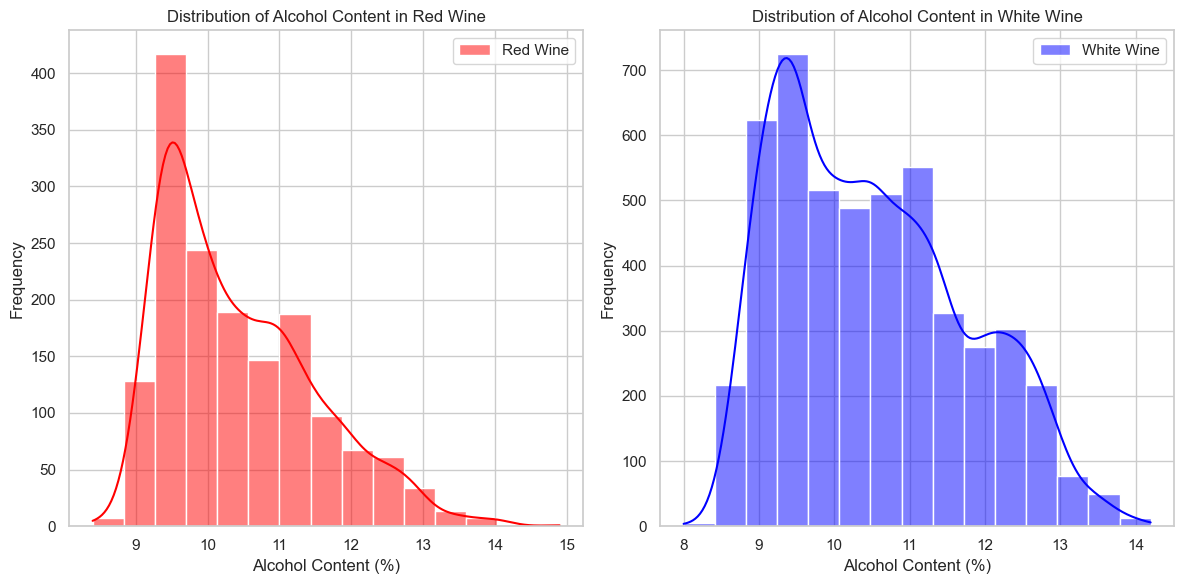

In [118]:
# Set the style for the plot (optional, but makes it visually appealing)
sns.set(style="whitegrid")

# Create subplots for red and white wines
plt.figure(figsize=(12, 6))

# Plot histogram for red wines
plt.subplot(1, 2, 1)
sns.histplot(red_wine['alcohol'], bins=15, color='red', label='Red Wine', kde=True)
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content in Red Wine')
plt.legend()

# Plot histogram for white wines
plt.subplot(1, 2, 2)
sns.histplot(white_wine['alcohol'], bins=15, color='blue', label='White Wine', kde=True)
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content in White Wine')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Sulfates

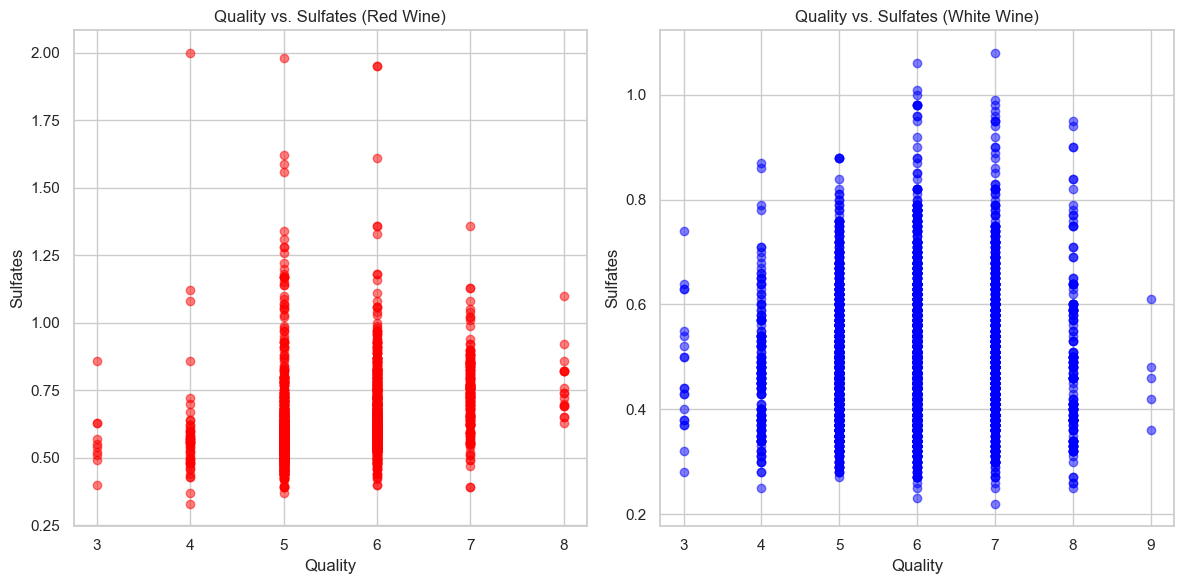

In [119]:
# Create subplots for red and white wines
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for red wines
axes[0].scatter(red_wine['quality'], red_wine['sulphates'], color='red', alpha=0.5)
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Sulfates')
axes[0].set_title('Quality vs. Sulfates (Red Wine)')

# Scatter plot for white wines
axes[1].scatter(white_wine['quality'], white_wine['sulphates'], color='blue', alpha=0.5)
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Sulfates')
axes[1].set_title('Quality vs. Sulfates (White Wine)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

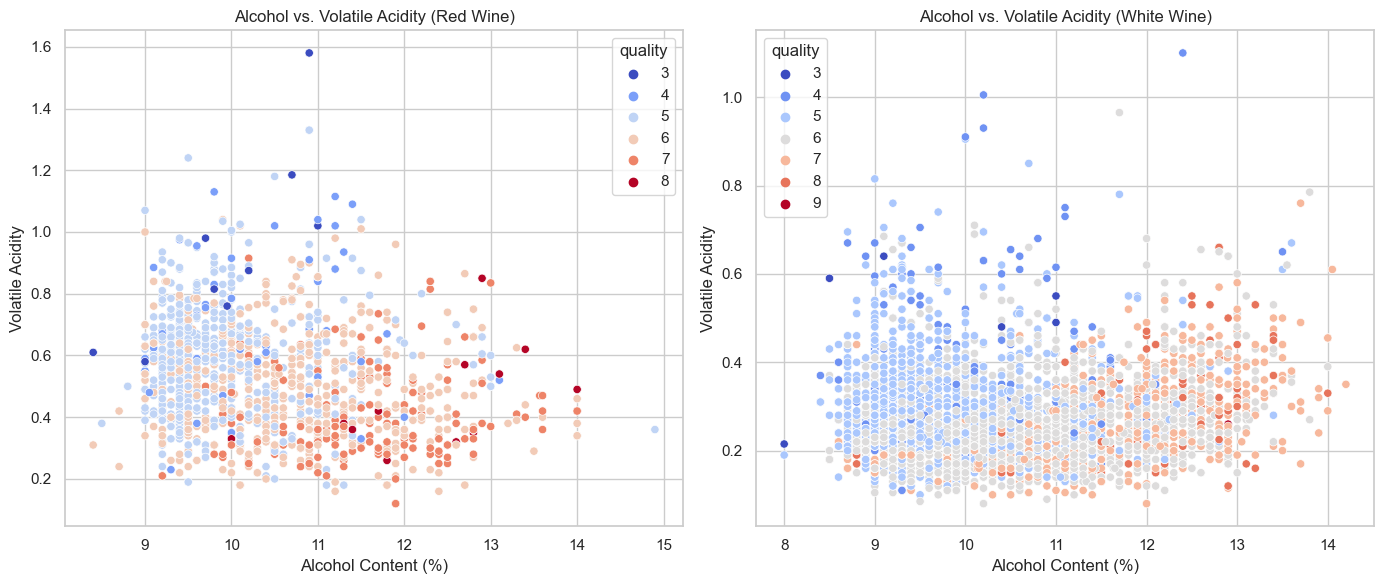

In [120]:
# Create subplots for red and white wines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for red wines
sns.scatterplot(data=red_wine, x='alcohol', y='volatile acidity', hue='quality', palette='coolwarm', ax=axes[0])
axes[0].set_xlabel('Alcohol Content (%)')
axes[0].set_ylabel('Volatile Acidity')
axes[0].set_title('Alcohol vs. Volatile Acidity (Red Wine)')

# Scatter plot for white wines
sns.scatterplot(data=white_wine, x='alcohol', y='volatile acidity', hue='quality', palette='coolwarm', ax=axes[1])
axes[1].set_xlabel('Alcohol Content (%)')
axes[1].set_ylabel('Volatile Acidity')
axes[1].set_title('Alcohol vs. Volatile Acidity (White Wine)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Preprocess Data

#### Intermezzo: Correlation Matrix

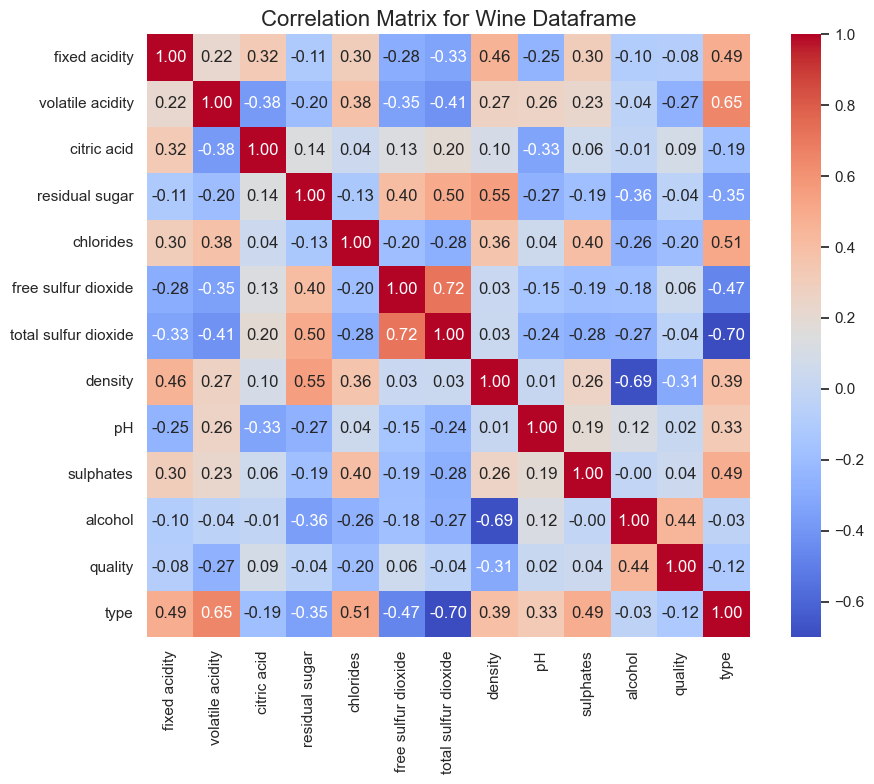

In [121]:
# Calculate the correlation matrix for the entire wine dataframe
correlation_matrix = wine.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Customize the plot
plt.title('Correlation Matrix for Wine Dataframe', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

### Train and Test Sets

In [122]:
# Separate features (X) and target variable (y)
X = wine.drop(columns=['type'])
y = wine['type']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [123]:
# Create a Sequential model
model = tf.keras.models.Sequential()

# Add the input layer with 12 input features (assuming 12 features)
model.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(12,)))

# Add one or more hidden layers (e.g., one hidden layer with 8 units)
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Add the output layer with 1 unit and a sigmoid activation function
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 12)                156       
                                                                 
 dense_36 (Dense)            (None, 8)                 104       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile and Fit

In [124]:
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
5197/5197 [==============================] - 3s 462us/step - loss: 0.0834 - accuracy: 0.9796
Epoch 2/20
5197/5197 [==============================] - 3s 564us/step - loss: 0.0238 - accuracy: 0.9954
Epoch 3/20
5197/5197 [==============================] - 2s 462us/step - loss: 0.0196 - accuracy: 0.9967
Epoch 4/20
5197/5197 [==============================] - 2s 473us/step - loss: 0.0181 - accuracy: 0.9963
Epoch 5/20
5197/5197 [==============================] - 2s 475us/step - loss: 0.0166 - accuracy: 0.9969
Epoch 6/20
5197/5197 [==============================] - 2s 475us/step - loss: 0.0148 - accuracy: 0.9973
Epoch 7/20
5197/5197 [==============================] - 2s 459us/step - loss: 0.0154 - accuracy: 0.9971
Epoch 8/20
5197/5197 [==============================] - 2s 469us/step - loss: 0.0134 - accuracy: 0.9977
Epoch 9/20
5197/5197 [==============================] - 2s 458us/step - loss: 0.0136 - accuracy: 0.9973
Epoch 10/20
5197/5197 [==============================] - 2s 456u

In [125]:
y_pred = (model.predict(X_test)> 0.5).astype("int32")

41/41 [==============================] - 0s 493us/step


In [126]:
y_pred[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [127]:
y_test[:5]

3103    0
1419    1
4761    0
4690    0
4032    0
Name: type, dtype: int64

### Evaluate Model

In [128]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

41/41 [==============================] - 0s 596us/step - loss: 0.0307 - accuracy: 0.9954
[0.030675601214170456, 0.9953846335411072]


In [129]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[958,   1],
       [  5, 336]])

In [130]:
# Precision 
precision_score(y_test, y_pred)

0.9970326409495549

In [131]:
# F1 score
f1_score(y_test,y_pred)

0.9911504424778762

In [132]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred)

0.9880288412839221

## Predicting Wine Quality

### Preprocess Data

In [133]:
# Separate features (X) and target variable (y)
X = wine.drop(columns=['quality'])
y = wine['quality']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model Neural Network Architecture

In [136]:
# Create a Sequential model
model = tf.keras.models.Sequential()

# Add the input layer with 12 input features (assuming 12 features)
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=12))

# Add a hidden layer with 64 units and relu activation
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Add the output layer for regression (1 unit, no activation)
model.add(tf.keras.layers.Dense(units=1))

# Print a summary of the model's architecture
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                832       
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_dim=12, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X.loc[train], y.loc[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 1s 3ms/step - loss: 4.4389 - mae: 1.3109
Epoch 2/10
163/163 [==============================] - 0s 482us/step - loss: 1.1409 - mae: 0.8409
Epoch 3/10
163/163 [==============================] - 0s 558us/step - loss: 1.1512 - mae: 0.8306
Epoch 4/10
163/163 [==============================] - 0s 475us/step - loss: 1.0432 - mae: 0.7977
Epoch 5/10
163/163 [==============================] - 0s 479us/step - loss: 1.0540 - mae: 0.8037
Epoch 6/10
163/163 [==============================] - 0s 484us/step - loss: 0.9933 - mae: 0.7822
Epoch 7/10
163/163 [==============================] - 0s 484us/step - loss: 1.0129 - mae: 0.7753
Epoch 8/10
163/163 [==============================] - 0s 479us/step - loss: 1.0013 - mae: 0.7828
Epoch 9/10
163/163 [==============================] - 0s 481us/step - loss: 0.9639 - mae: 0.7637
Epoch 10/10
163/163 [==============================] - 0s 483us/step - loss: 0.9396 - mae: 0.7536
Epoch 1/10
163/163 [===========

### Evaluate the model

In [151]:
mse_value, mae_value = model.evaluate(X.loc[test], y.loc[test], verbose=0)

print(mse_value)
print(mae_value)

0.6067273616790771
0.5906208753585815


## Model Fine-Tuning

### Adding Layers

In [152]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_dim=12, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X.loc[train], y.loc[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 1s 876us/step - loss: 5.3711 - mae: 1.7127
Epoch 2/10
163/163 [==============================] - 0s 786us/step - loss: 2.7938 - mae: 1.3227
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 2.1126 - mae: 1.1304
Epoch 4/10
163/163 [==============================] - 0s 946us/step - loss: 1.7503 - mae: 1.0220
Epoch 5/10
163/163 [==============================] - 0s 718us/step - loss: 1.5180 - mae: 0.9518
Epoch 6/10
163/163 [==============================] - 0s 868us/step - loss: 1.2490 - mae: 0.8731
Epoch 7/10
163/163 [==============================] - 0s 2ms/step - loss: 1.1342 - mae: 0.8324
Epoch 8/10
163/163 [==============================] - 0s 771us/step - loss: 1.0660 - mae: 0.8086
Epoch 9/10
163/163 [==============================] - 0s 1ms/step - loss: 0.9802 - mae: 0.7735
Epoch 10/10
163/163 [==============================] - 0s 1ms/step - loss: 0.9325 - mae: 0.7527
Epoch 1/10
163/163 [=================

In [153]:
mse_value, mae_value = model.evaluate(X.loc[test], y.loc[test], verbose=0)

print(mse_value)
print(mae_value)

1.3519471883773804
0.9694154858589172


### Hidden Units

In [155]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim=12, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X.loc[train], y.loc[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 0s 1ms/step - loss: 7.1206 - mae: 1.6117
Epoch 2/10
163/163 [==============================] - 0s 2ms/step - loss: 1.9505 - mae: 1.0785
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 1.8583 - mae: 1.0573
Epoch 4/10
163/163 [==============================] - 0s 673us/step - loss: 1.6539 - mae: 1.0012
Epoch 5/10
163/163 [==============================] - 0s 549us/step - loss: 1.6341 - mae: 0.9932
Epoch 6/10
163/163 [==============================] - 0s 498us/step - loss: 1.6333 - mae: 1.0075
Epoch 7/10
163/163 [==============================] - 0s 507us/step - loss: 1.5265 - mae: 0.9656
Epoch 8/10
163/163 [==============================] - 0s 506us/step - loss: 1.5503 - mae: 0.9681
Epoch 9/10
163/163 [==============================] - 0s 501us/step - loss: 1.4589 - mae: 0.9457
Epoch 10/10
163/163 [==============================] - 0s 500us/step - loss: 1.4586 - mae: 0.9592
Epoch 1/10
163/163 [===============

In [156]:
mse_value, mae_value = model.evaluate(X.loc[test], y.loc[test], verbose=0)

print(mse_value)
print(mae_value)

1.6760973930358887
1.0760047435760498


### Some More Experiments: Optimization Parameters

In [159]:
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])
model.fit(X.loc[train], y.loc[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 0s 559us/step - loss: 1.5583 - mae: 0.9588
Epoch 2/10
163/163 [==============================] - 0s 546us/step - loss: 1.4033 - mae: 0.9360
Epoch 3/10
163/163 [==============================] - 0s 581us/step - loss: 1.3895 - mae: 0.9155
Epoch 4/10
163/163 [==============================] - 0s 594us/step - loss: 1.3214 - mae: 0.8881
Epoch 5/10
163/163 [==============================] - 0s 530us/step - loss: 1.3504 - mae: 0.9078
Epoch 6/10
163/163 [==============================] - 0s 534us/step - loss: 1.2936 - mae: 0.8815
Epoch 7/10
163/163 [==============================] - 0s 514us/step - loss: 1.2899 - mae: 0.8804
Epoch 8/10
163/163 [==============================] - 0s 517us/step - loss: 1.2274 - mae: 0.8615
Epoch 9/10
163/163 [==============================] - 0s 502us/step - loss: 1.2618 - mae: 0.8804
Epoch 10/10
163/163 [==============================] - 0s 494us/step - loss: 1.2500 - mae: 0.8936


In [160]:
mse_value, mae_value = model.evaluate(X.loc[test], y.loc[test], verbose=0)

print(mse_value)
print(mae_value)

1.1896955966949463
0.8721325993537903


In [161]:
sgd=SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])
model.fit(X.loc[train], y.loc[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 0s 556us/step - loss: 1068.9399 - mae: 4.0721
Epoch 2/10
163/163 [==============================] - 0s 513us/step - loss: 0.7617 - mae: 0.6891
Epoch 3/10
163/163 [==============================] - 0s 502us/step - loss: 0.7603 - mae: 0.6852
Epoch 4/10
163/163 [==============================] - 0s 471us/step - loss: 0.7629 - mae: 0.6845
Epoch 5/10
163/163 [==============================] - 0s 489us/step - loss: 0.7619 - mae: 0.6846
Epoch 6/10
163/163 [==============================] - 0s 470us/step - loss: 0.7612 - mae: 0.6865
Epoch 7/10
163/163 [==============================] - 0s 482us/step - loss: 0.7617 - mae: 0.6835
Epoch 8/10
163/163 [==============================] - 0s 474us/step - loss: 0.7621 - mae: 0.6848
Epoch 9/10
163/163 [==============================] - 0s 467us/step - loss: 0.7614 - mae: 0.6859
Epoch 10/10
163/163 [==============================] - 0s 470us/step - loss: 0.7627 - mae: 0.6864


In [162]:
mse_value, mae_value = model.evaluate(X.loc[test], y.loc[test], verbose=0)

print(mse_value)
print(mae_value)

0.763569176197052
0.6824249029159546
